## Importaciones 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import dataframe_image as dfi

In [2]:
df1 = pd.read_csv('/Users/yairmartinez/Documents/GitHub/Data_visualization/Extract/sales_train_evaluation.csv' , header= None )

/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_16324/3686450281.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

## Crear tabla de sumatorias

In [3]:
# Columna de sumatorias por renglón

Tot_Art = 0

for x in range ( 6, ( len(df1.columns)) ):
    sumatoria = pd.to_numeric(df1[x][1:])
    Tot_Art = sumatoria + Tot_Art

# for x in range ( 6, 8 ):
#     sumatoria = pd.to_numeric(df1[x][1:])
#     Tot_Art = sumatoria + Tot_Art

In [4]:
len(Tot_Art) , sum(Tot_Art)

(30490, 66927173)

In [5]:
# Formato de tabla solo con sumatorias

contador = []
for x in range ( 6, ( len(df1.columns)) ):
    contador.append(x)

df1_m = df1.drop(df1.columns[contador], axis=1) 

df1_m[6] = Tot_Art

df1_m = df1_m.drop(0, axis=0)
df1_m.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

df1_m

,0,1,2,3,4,5,6
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,633.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,500.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,309.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,3337.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1888.0
...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1040.0
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,728.0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1734.0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,739.0


In [6]:
# Se divide el df por estado
df1_CA = df1_m[ ( df1_m[5] == 'CA' ) ]
df1_TX = df1_m[ ( df1_m[5] == 'TX' ) ]
df1_WI = df1_m[ ( df1_m[5] == 'WI' ) ]

In [7]:
df1_CA.shape , df1_TX.shape , df1_WI.shape, df1_m.shape

((12196, 7), (9147, 7), (9147, 7), (30490, 7))

In [8]:
df1_CA.head(3)

,0,1,2,3,4,5,6
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,633.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,500.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,309.0


## Gráficas

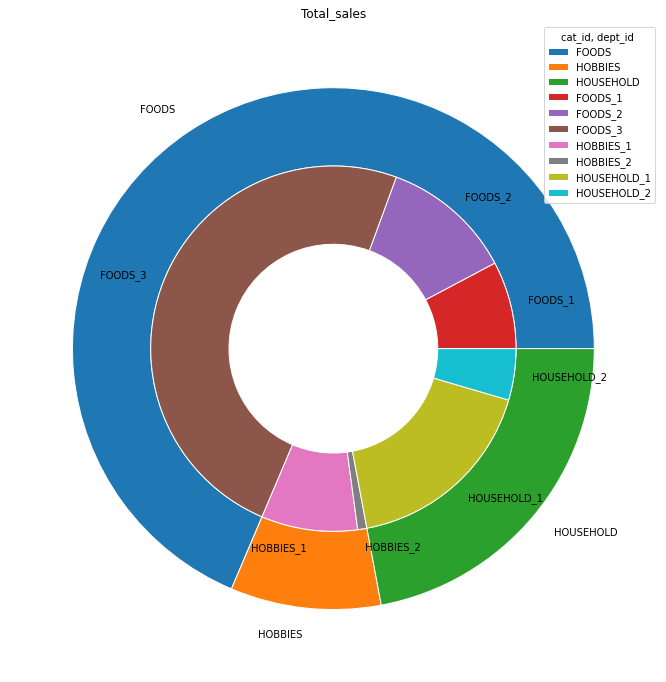

In [9]:
# Se grafica en forma de pie para TOTAL y se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/

outer= df1_m.groupby(3).sum()
inner= df1_m.groupby([3,2]).sum()
inner_labbels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize= (12,12))

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       # autopct='%1.2f%%',
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-.3, 
       labels = inner_labbels,
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.set(aspect="equal", title='Total_sales')

plt.legend(title= 'cat_id, dept_id ')
# plt.show()

plt.savefig("5_Venta_en_cantidad_por_cat&dept.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/5_Venta_en_cantidad_por_cat&dept.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/5_Venta_en_cantidad_por_cat&dept.png'
shutil.move(pos1,pos2)

plt.show()

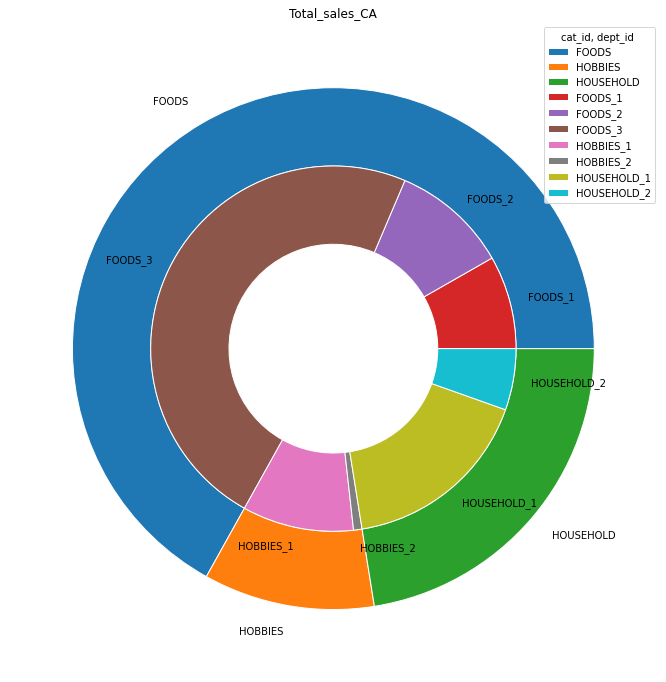

In [10]:
# Se grafica en forma de pie para CA y se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/

outer= df1_CA.groupby(3).sum()
inner= df1_CA.groupby([3,2]).sum()
inner_labbels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize= (12,12))

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       # autopct='%1.2f%%',
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-.3, 
       labels = inner_labbels,
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.set(aspect="equal", title='Total_sales_CA')

plt.legend(title= 'cat_id, dept_id ')

plt.savefig("6_Venta_en_cantidad_por_cat&dept_CA.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/6_Venta_en_cantidad_por_cat&dept_CA.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/6_Venta_en_cantidad_por_cat&dept_CA.png'
shutil.move(pos1,pos2)

plt.show()

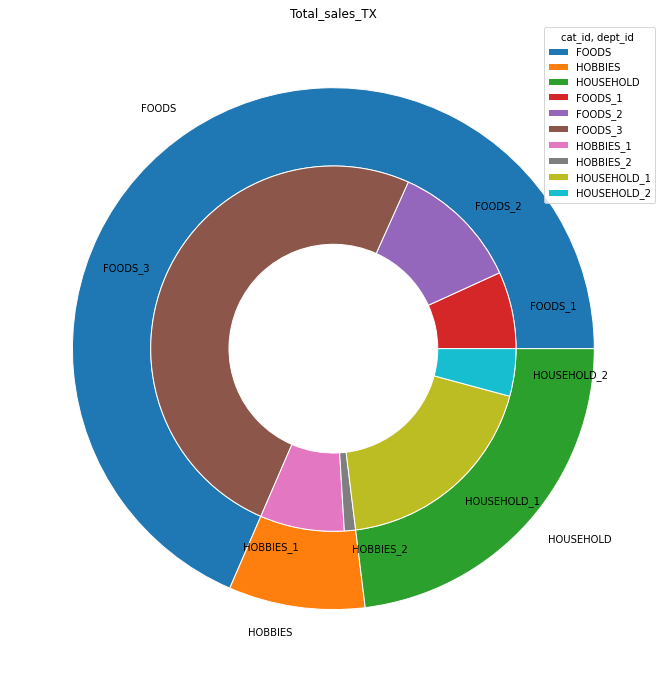

In [11]:
# Se grafica en forma de pie para TX y se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/

outer= df1_TX.groupby(3).sum()
inner= df1_TX.groupby([3,2]).sum()
inner_labbels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize= (12,12))

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       # autopct='%1.2f%%',
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-.3, 
       labels = inner_labbels,
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.set(aspect="equal", title='Total_sales_TX')

plt.legend(title= 'cat_id, dept_id ')

plt.savefig("7_Venta_en_cantidad_por_cat&dept_TX.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/7_Venta_en_cantidad_por_cat&dept_TX.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/7_Venta_en_cantidad_por_cat&dept_TX.png'
shutil.move(pos1,pos2)

plt.show()

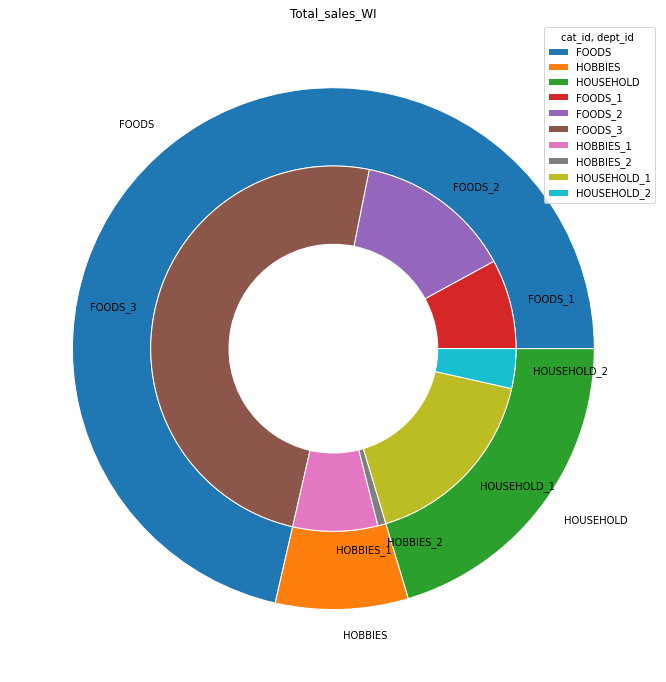

In [12]:
# Se grafica en forma de pie para WI y se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/

outer= df1_WI.groupby(3).sum()
inner= df1_WI.groupby([3,2]).sum()
inner_labbels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize= (12,12))

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       # autopct='%1.2f%%',
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-.3, 
       labels = inner_labbels,
       wedgeprops=dict(width=.3, edgecolor='w'))

ax.set(aspect="equal", title='Total_sales_WI')

plt.legend(title= 'cat_id, dept_id ')

plt.savefig("8_Venta_en_cantidad_por_cat&dept_WI.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/8_Venta_en_cantidad_por_cat&dept_WI.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/8_Venta_en_cantidad_por_cat&dept_WI.png'
shutil.move(pos1,pos2)

plt.show()

## Preparar datos para dráfica de dispersión tablas

In [13]:
# Definir tabla donde irá porcentaje 
# La columna 6 indica la sumatoria de las ventas

cat_id_percentage= df1_CA.groupby(3).sum()
cat_id_percentage

,6
3,
FOODS,19535863.0
HOBBIES,3095587.0
HOUSEHOLD,6565267.0


In [14]:
# Definir tabla donde irá porcentaje
# En cat_id por estado

#TOTAL
cat_id_1_tot=(df1_m.groupby(3).sum()).values[0].sum()
cat_id_2_tot=(df1_m.groupby(3).sum()).values[1].sum()
cat_id_3_tot=(df1_m.groupby(3).sum()).values[2].sum()
cat_id_sum_tot=(df1_m.groupby(3).sum()).values.sum()

#California
cat_id_1_CA=(df1_CA.groupby(3).sum()).values[0].sum()
cat_id_2_CA=(df1_CA.groupby(3).sum()).values[1].sum()
cat_id_3_CA=(df1_CA.groupby(3).sum()).values[2].sum()
cat_id_sum_CA=(df1_CA.groupby(3).sum()).values.sum()

#Texas
cat_id_1_TX=(df1_TX.groupby(3).sum()).values[0].sum()
cat_id_2_TX=(df1_TX.groupby(3).sum()).values[1].sum()
cat_id_3_TX=(df1_TX.groupby(3).sum()).values[2].sum()
cat_id_sum_TX=(df1_TX.groupby(3).sum()).values.sum()

#Winsconsin
cat_id_1_WI=(df1_WI.groupby(3).sum()).values[0].sum()
cat_id_2_WI=(df1_WI.groupby(3).sum()).values[1].sum()
cat_id_3_WI=(df1_WI.groupby(3).sum()).values[2].sum()
cat_id_sum_WI=(df1_WI.groupby(3).sum()).values.sum()


In [15]:
# Asignacion de porcentaje en la suma de cat_id
# Porcentajes en TOT, CA, TX, WI
cat_id_percentage['Percentage_Tot']= [cat_id_1_tot/cat_id_sum_tot, cat_id_2_tot/cat_id_sum_tot, cat_id_3_tot/cat_id_sum_tot]
cat_id_percentage['Percentage_CA']= [cat_id_1_CA/cat_id_sum_CA, cat_id_2_CA/cat_id_sum_CA, cat_id_3_CA/cat_id_sum_CA]
cat_id_percentage['Percentage_TX']= [cat_id_1_TX/cat_id_sum_TX, cat_id_2_TX/cat_id_sum_TX, cat_id_3_TX/cat_id_sum_TX]
cat_id_percentage['Percentage_WI']= [cat_id_1_WI/cat_id_sum_WI, cat_id_2_WI/cat_id_sum_WI, cat_id_3_WI/cat_id_sum_WI]

In [16]:
# Visualizador
cat_id_percentage

,6,Percentage_Tot,Percentage_CA,Percentage_TX,Percentage_WI
3,,,,,
FOODS,19535863.0,0.686155,0.669112,0.685034,0.714216
HOBBIES,3095587.0,0.093245,0.106025,0.084465,0.082204
HOUSEHOLD,6565267.0,0.220599,0.224863,0.230501,0.203580


In [17]:
# Definir tabla donde irá porcentaje 
# La columna 6 indica la sumatoria de las ventas

dep_id_percentage= df1_m.groupby([3,2]).sum()
dep_id_percentage

6
3         2                      
FOODS     FOODS_1       5190400.0
          FOODS_2       7795025.0
          FOODS_3      32937002.0
HOBBIES   HOBBIES_1     5699014.0
          HOBBIES_2      541642.0
HOUSEHOLD HOUSEHOLD_1  11722853.0
          HOUSEHOLD_2   3041237.0

In [18]:
# Definir tabla donde irá porcentaje
# En dep_id por estado

#TOTAL
dep_id_1_tot= df1_m.groupby([3,2]).sum().values[0].sum()
dep_id_2_tot= df1_m.groupby([3,2]).sum().values[1].sum()
dep_id_3_tot= df1_m.groupby([3,2]).sum().values[2].sum()
dep_id_4_tot= df1_m.groupby([3,2]).sum().values[3].sum()
dep_id_5_tot= df1_m.groupby([3,2]).sum().values[4].sum()
dep_id_6_tot= df1_m.groupby([3,2]).sum().values[5].sum()
dep_id_7_tot= df1_m.groupby([3,2]).sum().values[6].sum()
dep_id_sum_tot= df1_m.groupby([3,2]).sum().values.sum()

#California
dep_id_1_CA= df1_CA.groupby([3,2]).sum().values[0].sum()
dep_id_2_CA= df1_CA.groupby([3,2]).sum().values[1].sum()
dep_id_3_CA= df1_CA.groupby([3,2]).sum().values[2].sum()
dep_id_4_CA= df1_CA.groupby([3,2]).sum().values[3].sum()
dep_id_5_CA= df1_CA.groupby([3,2]).sum().values[4].sum()
dep_id_6_CA= df1_CA.groupby([3,2]).sum().values[5].sum()
dep_id_7_CA= df1_CA.groupby([3,2]).sum().values[6].sum()
dep_id_sum_CA= df1_CA.groupby([3,2]).sum().values.sum()

#Texas
dep_id_1_TX= df1_TX.groupby([3,2]).sum().values[0].sum()
dep_id_2_TX= df1_TX.groupby([3,2]).sum().values[1].sum()
dep_id_3_TX= df1_TX.groupby([3,2]).sum().values[2].sum()
dep_id_4_TX= df1_TX.groupby([3,2]).sum().values[3].sum()
dep_id_5_TX= df1_TX.groupby([3,2]).sum().values[4].sum()
dep_id_6_TX= df1_TX.groupby([3,2]).sum().values[5].sum()
dep_id_7_TX= df1_TX.groupby([3,2]).sum().values[6].sum()
dep_id_sum_TX= df1_TX.groupby([3,2]).sum().values.sum()

#Winsconsin
dep_id_1_WI= df1_WI.groupby([3,2]).sum().values[0].sum()
dep_id_2_WI= df1_WI.groupby([3,2]).sum().values[1].sum()
dep_id_3_WI= df1_WI.groupby([3,2]).sum().values[2].sum()
dep_id_4_WI= df1_WI.groupby([3,2]).sum().values[3].sum()
dep_id_5_WI= df1_WI.groupby([3,2]).sum().values[4].sum()
dep_id_6_WI= df1_WI.groupby([3,2]).sum().values[5].sum()
dep_id_7_WI= df1_WI.groupby([3,2]).sum().values[6].sum()
dep_id_sum_WI= df1_WI.groupby([3,2]).sum().values.sum()


In [19]:
# dep_id_percentage['Percentage_Tot']= [dep_id_1_tot/dep_id_sum_tot, dep_id_2_tot/dep_id_sum_tot, dep_id_3_tot/dep_id_sum_tot, 
# dep_id_4_tot/dep_id_sum_tot, dep_id_5_tot/dep_id_sum_tot, dep_id_6_tot/dep_id_sum_tot, dep_id_7_tot/dep_id_sum_tot ]

# dep_id_percentage['Percentage_Tot']=dep_id_percentage['Percentage_Tot'].map('{:.2%}'.format)

In [20]:
# Asignacion de porcentaje en la suma de dep_id
# Porcentajes en TOT, CA, TX, WI

dep_id_percentage['Percentage_Tot']= [dep_id_1_tot/dep_id_sum_tot, dep_id_2_tot/dep_id_sum_tot, dep_id_3_tot/dep_id_sum_tot, 
dep_id_4_tot/dep_id_sum_tot, dep_id_5_tot/dep_id_sum_tot, dep_id_6_tot/dep_id_sum_tot, dep_id_7_tot/dep_id_sum_tot ]

dep_id_percentage['Percentage_CA']= [dep_id_1_CA/dep_id_sum_CA, dep_id_2_CA/dep_id_sum_CA, dep_id_3_CA/dep_id_sum_CA, 
dep_id_4_CA/dep_id_sum_CA, dep_id_5_CA/dep_id_sum_CA, dep_id_6_CA/dep_id_sum_CA, dep_id_7_CA/dep_id_sum_CA ]

dep_id_percentage['Percentage_TX']= [dep_id_1_TX/dep_id_sum_TX, dep_id_2_TX/dep_id_sum_TX, dep_id_3_TX/dep_id_sum_TX, 
dep_id_4_TX/dep_id_sum_TX, dep_id_5_TX/dep_id_sum_TX, dep_id_6_TX/dep_id_sum_TX, dep_id_7_TX/dep_id_sum_TX ]

dep_id_percentage['Percentage_WI']= [dep_id_1_WI/dep_id_sum_WI, dep_id_2_WI/dep_id_sum_WI, dep_id_3_WI/dep_id_sum_WI, 
dep_id_4_WI/dep_id_sum_WI, dep_id_5_WI/dep_id_sum_WI, dep_id_6_WI/dep_id_sum_WI, dep_id_7_WI/dep_id_sum_WI ]

In [21]:
# Visualizador

dep_id_percentage = dep_id_percentage.drop(6, axis=1)
dep_id_percentage

Percentage_Tot  Percentage_CA  Percentage_TX  \
3         2                                                           
FOODS     FOODS_1            0.077553       0.082570       0.068157   
          FOODS_2            0.116470       0.103389       0.114570   
          FOODS_3            0.492132       0.483153       0.502307   
HOBBIES   HOBBIES_1          0.085152       0.098550       0.074567   
          HOBBIES_2          0.008093       0.007475       0.009898   
HOUSEHOLD HOUSEHOLD_1        0.175158       0.170575       0.188550   
          HOUSEHOLD_2        0.045441       0.054288       0.041951   

                       Percentage_WI  
3         2                           
FOODS     FOODS_1           0.079401  
          FOODS_2           0.139088  
          FOODS_3           0.495727  
HOBBIES   HOBBIES_1         0.075011  
          HOBBIES_2         0.007193  
HOUSEHOLD HOUSEHOLD_1       0.168474  
          HOUSEHOLD_2       0.035107

In [22]:
# Visualizador
cat_id_percentage = cat_id_percentage.drop(6, axis=1)
cat_id_percentage

,Percentage_Tot,Percentage_CA,Percentage_TX,Percentage_WI
3,,,,
FOODS,0.686155,0.669112,0.685034,0.714216
HOBBIES,0.093245,0.106025,0.084465,0.082204
HOUSEHOLD,0.220599,0.224863,0.230501,0.203580


## Gráficas y Tablas

<function matplotlib.pyplot.show(close=None, block=None)>

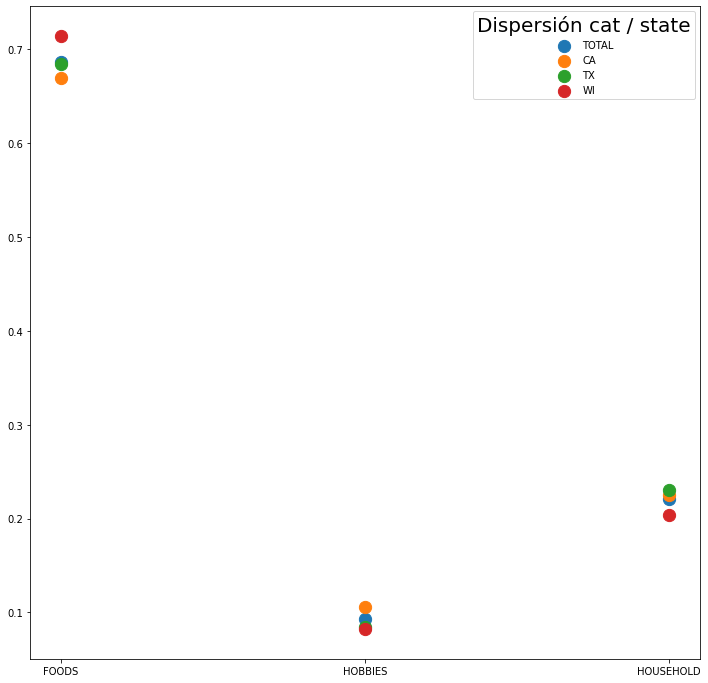

In [23]:
# Gráfica de dispersión por cat y estado se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/


x = cat_id_percentage.index
y1 = cat_id_percentage['Percentage_Tot']
y2 = cat_id_percentage['Percentage_CA']
y3 = cat_id_percentage['Percentage_TX']
y4 = cat_id_percentage['Percentage_WI']

fig, ax = plt.subplots(figsize= (12,12))

plt.scatter(x,y1, s= 150)
plt.scatter(x,y2, s= 150)
plt.scatter(x,y3, s= 150)
plt.scatter(x,y4, s= 150)

plt.legend(('TOTAL', 'CA', 'TX', 'WI'), title = 'Dispersión cat / state' , title_fontsize= 20, ncol=1, loc="upper right") #bbox_to_anchor=(.1,.1))

plt.savefig("9_Dispersion_Venta_en_cantidad_por_cat&state.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/9_Dispersion_Venta_en_cantidad_por_cat&state.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/9_Dispersion_Venta_en_cantidad_por_cat&state.png'
shutil.move(pos1,pos2)

plt.show

In [24]:
# Se crea tabla para imprimir porcentajes como imagenes
# Se crean los porcentajes
cat_id_percentage_g=cat_id_percentage
cat_id_percentage_g['Percentage_Tot']=cat_id_percentage['Percentage_Tot'].map('{:.2%}'.format)
cat_id_percentage_g['Percentage_CA']=cat_id_percentage['Percentage_CA'].map('{:.2%}'.format)
cat_id_percentage_g['Percentage_TX']=cat_id_percentage['Percentage_TX'].map('{:.2%}'.format)
cat_id_percentage_g['Percentage_WI']=cat_id_percentage['Percentage_WI'].map('{:.2%}'.format)

In [25]:
#Se visualiza tabla para imprimir porcentajes como imagenes
cat_id_percentage_g

,Percentage_Tot,Percentage_CA,Percentage_TX,Percentage_WI
3,,,,
FOODS,68.62%,66.91%,68.50%,71.42%
HOBBIES,9.32%,10.60%,8.45%,8.22%
HOUSEHOLD,22.06%,22.49%,23.05%,20.36%


In [26]:
# Se rea la imagen de la tabla anterior
# Se mueve al dir :  /Data_visualization/Load/Gráficas/
df_styled = cat_id_percentage_g.style.background_gradient()
dfi.export(df_styled, '11_cat_tab_percentage.png')

pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/11_cat_tab_percentage.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/11_cat_tab_percentage.png'
shutil.move(pos1,pos2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
objc[16365]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a68948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x115211d18). One of the two will be used. Which one is undefined.
[0707/160227.661019:INFO:headless_shell.cc(660)] Written to file /var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/tmp_pvgke7c/temp.png.


'/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/11_cat_tab_percentage.png'

<function matplotlib.pyplot.show(close=None, block=None)>

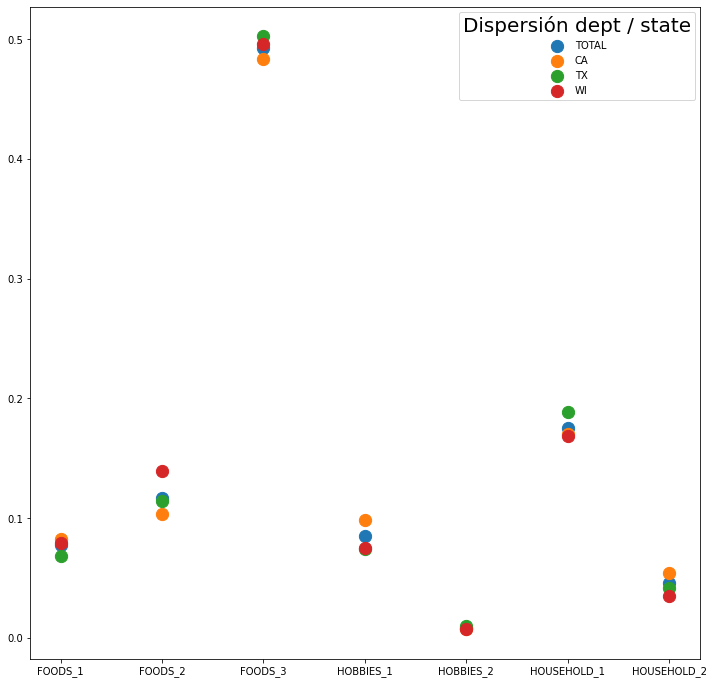

In [27]:
# Gráfica de dispersión por dep y estado se guarda en el directorio:
#  /Data_visualization/Load/Gráficas/

x = dep_id_percentage.index.get_level_values(1)
y1 = dep_id_percentage['Percentage_Tot']
y2 = dep_id_percentage['Percentage_CA']
y3 = dep_id_percentage['Percentage_TX']
y4 = dep_id_percentage['Percentage_WI']

fig, ax = plt.subplots(figsize= (12,12))

plt.scatter(x,y1,s= 150)
plt.scatter(x,y2,s= 150)
plt.scatter(x,y3,s= 150)
plt.scatter(x,y4,s= 150)

plt.legend(('TOTAL', 'CA', 'TX', 'WI'), title = 'Dispersión dept / state' , title_fontsize= 20, ncol=1, loc="upper right") #bbox_to_anchor=(.1,.1)))

plt.savefig("10_Dispersion_Venta_en_cantidad_por_dept&state.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/10_Dispersion_Venta_en_cantidad_por_dept&state.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/10_Dispersion_Venta_en_cantidad_por_dept&state.png'
shutil.move(pos1,pos2)

plt.show

In [28]:
# Se crea tabla para imprimir porcentajes como imagenes
# Se crean los porcentajes

dep_id_percentage_g=dep_id_percentage
dep_id_percentage['Percentage_Tot']=dep_id_percentage['Percentage_Tot'].map('{:.2%}'.format)
dep_id_percentage['Percentage_CA']=dep_id_percentage['Percentage_CA'].map('{:.2%}'.format)
dep_id_percentage['Percentage_TX']=dep_id_percentage['Percentage_TX'].map('{:.2%}'.format)
dep_id_percentage['Percentage_WI']=dep_id_percentage['Percentage_WI'].map('{:.2%}'.format)

cat_id_percentage_g

,Percentage_Tot,Percentage_CA,Percentage_TX,Percentage_WI
3,,,,
FOODS,68.62%,66.91%,68.50%,71.42%
HOBBIES,9.32%,10.60%,8.45%,8.22%
HOUSEHOLD,22.06%,22.49%,23.05%,20.36%


In [29]:
# Se crea la imagen de la tabla anterior
# Se mueve al dir :  /Data_visualization/Load/Gráficas/

df_styled = dep_id_percentage_g.style.background_gradient()
dfi.export(df_styled, '12_dep_tab_percentage.png')

pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/12_dep_tab_percentage.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/12_dep_tab_percentage.png'
shutil.move(pos1,pos2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
objc[16397]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb59a68948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.114/Libraries/libGLESv2.dylib (0x110f43d18). One of the two will be used. Which one is undefined.
[0707/160229.337629:INFO:headless_shell.cc(660)] Written to file /var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/tmpkglhye9b/temp.png.


'/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/12_dep_tab_percentage.png'